In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

EXPLORATORY ANALYSIS
To begin this exploratory analysis, first use matplotlib to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [15]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# AB_NYC_2019.csv has 48895 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'AB_NYC_2019.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 16 columns


In [16]:
df1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<Axes: xlabel='price'>

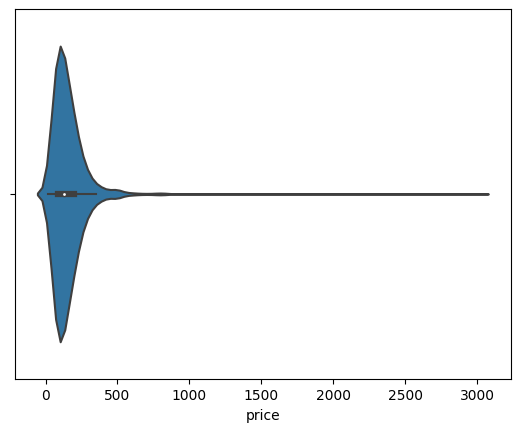

In [20]:
import seaborn as sns 
sns.violinplot(data = df1, x = df1['price'])

In [22]:
percentiles = np.linspace(.05, 1, num = 20)
df1.describe(percentiles = percentiles)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,959.000000,1000.000000,1000.000000
mean,175155.770000,7.413997e+05,40.728265,-73.963382,158.282000,9.137000,79.865000,0.931241,2.375000,169.895000
std,116242.926473,7.753802e+05,0.051538,0.033430,152.031708,24.284521,88.511169,0.968909,4.403381,132.998009
min,2539.000000,2.787000e+03,40.581470,-74.165340,20.000000,1.000000,0.000000,0.010000,1.000000,0.000000
5%,13787.300000,2.777530e+04,40.660081,-74.002681,50.000000,1.000000,1.000000,0.050000,1.000000,0.000000
10%,22917.300000,5.973400e+04,40.673844,-73.996289,64.000000,1.000000,4.000000,0.090000,1.000000,0.000000
15%,35411.100000,8.286435e+04,40.679628,-73.991430,70.850000,2.000000,7.000000,0.120000,1.000000,0.000000
20%,53469.800000,1.377376e+05,40.683516,-73.988576,79.000000,2.000000,10.000000,0.180000,1.000000,1.000000
25%,62458.750000,2.020110e+05,40.687815,-73.984525,85.000000,2.000000,15.000000,0.230000,1.000000,19.500000
30%,69618.000000,2.650547e+05,40.697711,-73.981128,95.000000,2.000000,19.700000,0.280000,1.000000,45.400000


In [25]:
percentile_05 = df1['price'].quantile(.05)
percentile_95 = df1['price'].quantile(.95)

df_clean = df1[(percentile_05 <= df1['price']) & (df1['price'] <= percentile_95)]

<Axes: xlabel='price'>

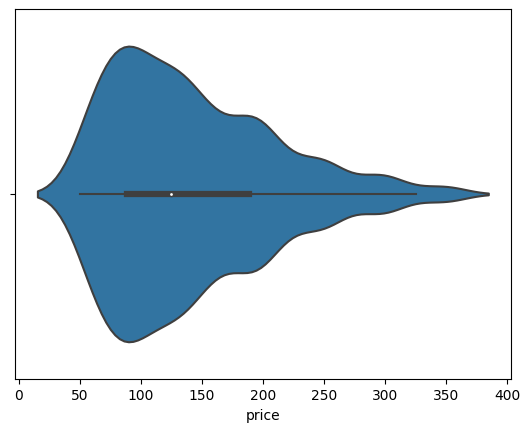

In [26]:
sns.violinplot(data = df_clean, x = df_clean['price'])